In [345]:
import pandas as pd
import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [346]:
def extract_iters (ep):
    file_pattern = f'Results/EP{ep}/EP{ep}_Ideal_points_emIRT_Iteration*.csv'
    
    # Use glob to list all files matching the pattern
    file_list = glob.glob(file_pattern)
    
    # Initialize an empty list to hold the DataFrames
    df_list = []
    
    for file in file_list:
        df = pd.read_csv(file)
        column = df[f'EPG....EPG{ep}']
        names = df[f'MepId....names{ep}']
        df = df['d1']
        
        df_list.append(df)
    
    combined_df = pd.concat(df_list, axis=0)
    
    # Calculate the average across the DataFrames
    average_df = combined_df.groupby(combined_df.index).mean()
    column = column.reset_index(drop=True)
    names = names.reset_index(drop=True)
    average_df = average_df.reset_index(drop=True)
    
    final_df = pd.concat([names, column, average_df], axis=1)
    
    final_df.columns = ['MepId','EPG', 'Average_position']
    return final_df

In [347]:


avg6 = extract_iters(6)

In [348]:
avg6

,MepId,EPG,Average_position
0,28469,GUE–NGL,7.789021
1,28302,IND/DEM,0.351206
2,28975,GUE–NGL,8.936521
3,28367,EPP-ED,-3.838777
4,28512,NI,-1.596996
...,...,...,...
935,95280,PES,2.084978
936,95281,PES,2.363334
937,95704,EPP-ED,-3.078250
938,96101,EPP-ED,-1.828385


In [349]:
avg7 = extract_iters(7)
avg8 = extract_iters(8)
avg9 = extract_iters(9)

In [350]:
mepinfo6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','mep_info_EP_6.csv'))
mepinfo7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','mep_info_EP_7.csv'))
mepinfo8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','mep_info_EP_8.csv'))

In [351]:
mepinfo7

,MepId,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,Birthday,Gender
0,96850,Damien,Abad,Damien ABAD,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE
1,96659,János,Áder,János ÁDER,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt,EPP,2009-07-14,2012-05-09,1959-05-09,MALE
2,96897,John Stuart,Agnew,John Stuart AGNEW,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE
3,28367,Gabriele,Albertini,Gabriele ALBERTINI,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE
4,96736,Jan Philipp,Albrecht,Jan Philipp ALBRECHT,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
848,122885,Rina Ronja,Kari,Rina Ronja KARI,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE
849,123792,Giovanni,Barbagallo,Giovanni BARBAGALLO,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE
850,123816,Annette,Koewius,Annette KOEWIUS,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE
851,37200,Katrin,Saks,Katrin SAKS,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE


In [352]:
avg7 = avg7.rename(columns={'MepId':'FullName'})
avg8 = avg8.rename(columns={'MepId':'FullName'})


In [353]:
avg7 = pd.merge(avg7, mepinfo7, on='FullName', how='left')
avg8 = pd.merge(avg8, mepinfo8, on='FullName', how='left')

In [354]:
avg8

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender
0,Lars ADAKTUSSON,NaN,2.445893,124990,Lars,Adaktusson,no,Sweden,Kristdemokraterna,NaN,2014-07-01,2018-09-23,1955-08-06,MALE
1,Isabella ADINOLFI,EFDD,-4.094120,124831,Isabella,Adinolfi,yes,Italy,Movimento 5 Stelle,EFDD,2014-07-01,2019-12-31,1978-03-27,FEMALE
2,Marco AFFRONTE,Greens–EFA,-4.801999,124797,Marco,Affronte,yes,Italy,Independent,Greens–EFA,2014-07-01,2019-12-31,1965-05-06,MALE
3,Laura AGEA,EFDD,-4.140657,124811,Laura,Agea,yes,Italy,Movimento 5 Stelle,EFDD,2014-07-01,2019-12-31,1978-02-17,FEMALE
4,John Stuart AGNEW,EFDD,0.855238,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFDD,2014-07-01,2019-12-31,1949-08-30,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,Aleksejs LOSKUTOVS,NaN,3.145643,196042,Aleksejs,Loskutovs,yes,Latvia,NaN,NaN,2019-01-24,2019-12-31,1962-08-22,MALE
854,Ralph PACKET,NaN,1.244146,195454,Ralph,Packet,yes,Belgium,NaN,NaN,2018-11-22,2019-12-31,1990-07-17,MALE
855,Kārlis ŠADURSKIS,NaN,3.867057,111033,Kārlis,Šadurskis,yes,Latvia,NaN,NaN,2018-11-28,2019-12-31,1959-10-11,MALE
856,Bogusław SONIK,NaN,4.034291,28299,Bogusław,Sonik,yes,Poland,NaN,NaN,2018-11-20,2019-12-31,1953-12-03,MALE


In [355]:
def load_vote_data(ep):
    df = pd.read_csv(os.path.join('Results', f'votes_plotly_{ep}.csv'))
    epg_counts = df['MepId'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['MepId'].value_counts()
    dataframe = pd.DataFrame()
    dataframe['MepId'] = df['MepId'].unique()
    proportions = epg_4_votes / epg_counts
    dataframe['Proportion'] = proportions
    return proportions.reset_index()

In [356]:
proportions6 = load_vote_data(6)
proportions7 = load_vote_data(7)
proportions8 = load_vote_data(8)
proportions9 = load_vote_data(9)

In [357]:
proportions6

,MepId,count
0,1,0.225198
1,234,0.007098
2,684,0.151960
3,729,0.026456
4,945,0.168576
...,...,...
935,95280,0.033231
936,95281,0.028714
937,95298,0.071302
938,95704,0.020003


In [358]:
final6 = pd.merge(proportions6, avg6, on='MepId', how='left')
final7 = pd.merge(proportions7, avg7, on='MepId', how='left')
final8 = pd.merge(proportions8, avg8, on='MepId', how='left')
final9 = pd.merge(proportions9, avg9, on='MepId', how='left')

In [359]:
final6


,MepId,count,EPG,Average_position
0,1,0.225198,EPP-ED,-5.521790
1,234,0.007098,GUE–NGL,1.782747
2,684,0.151960,EPP-ED,-3.907710
3,729,0.026456,EPP-ED,-3.269855
4,945,0.168576,EPP-ED,-3.209652
...,...,...,...,...
935,95280,0.033231,PES,2.084978
936,95281,0.028714,PES,2.363334
937,95298,0.071302,PES,2.219980
938,95704,0.020003,EPP-ED,-3.078250


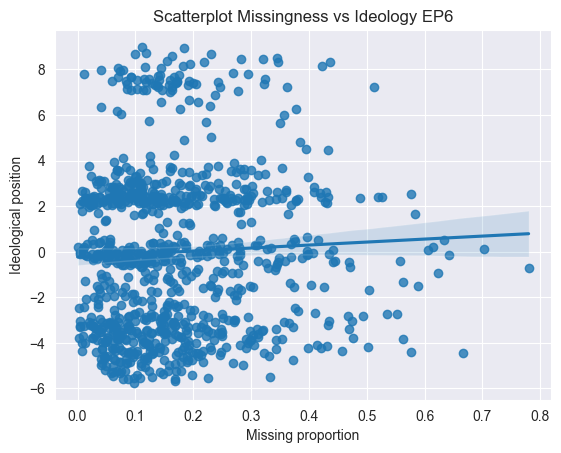

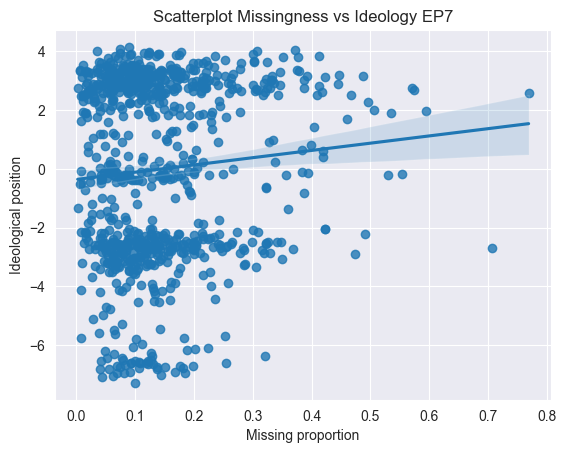

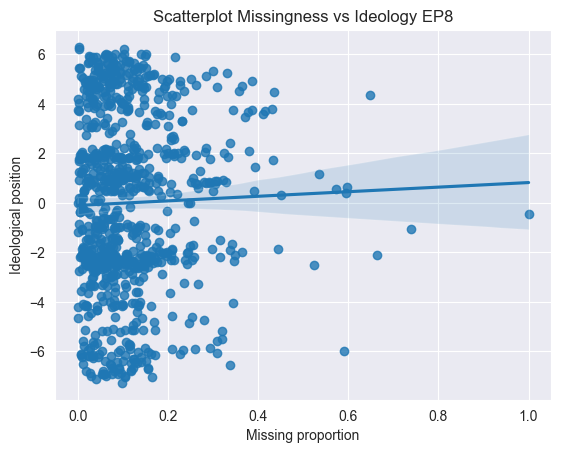

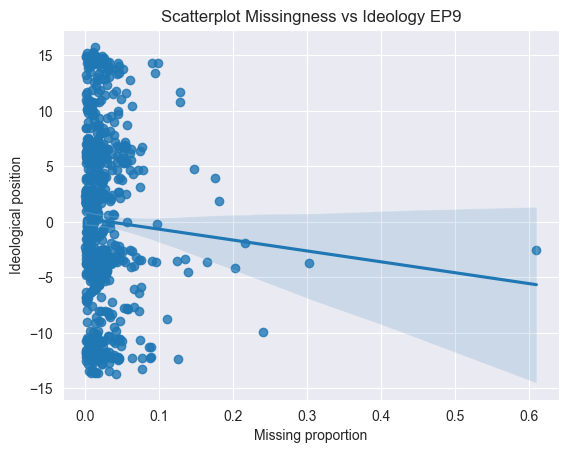

In [360]:
corr6 = final6['count'].corr(final6['Average_position'])
# Create a scatter plot with a regression line
sns.regplot(x="count", y="Average_position", data=final6)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP6")


# Show plot
plt.show()
corr7 = final7['count'].corr(final7['Average_position'])
sns.regplot(x="count", y="Average_position", data=final7)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP7")

# Show plot
plt.show()
corr8 = final8['count'].corr(final8['Average_position'])
sns.regplot(x="count", y="Average_position", data=final8)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP8")

# Show plot
plt.show()
corr9 = final9['count'].corr(final9['Average_position'])
sns.regplot(x="count", y="Average_position", data=final9)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP9")

# Show plot
plt.show()

In [361]:
corr6

0.0465415261294359

In [362]:
corr7

0.08457863779846958

In [363]:
corr8

0.02689546837880932

In [364]:
corr9


-0.04543762216219708

In [365]:
def recodeEMIRT(vote):
    if vote == 1:
        return 1
    if vote == 2:
        return -1
    return 0

In [366]:
def recodeWNOM(vote):
    if vote == 0:
        return 9
    if vote == 1:
        return 1
    if vote == 2:
        return 6
    return 9

In [367]:
matrix6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','wnominate_ep6_votes.csv'))
matrix7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','matrix_ep7_votes.csv'))
matrix8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','matrix_ep8_votes.csv'))
matrix9 = pd.read_csv(os.path.join('Cleaned_data','EP9_clean_data','matrix_ep9_votes.csv'))


In [368]:
matrix6.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6191', '6192', '6193', '6194', '6195', '6196', '6197', '6198', '6199',
       '6200'],
      dtype='object', length=6199)

In [369]:
matrix7.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6954', '6955', '6956', '6957', '6958', '6959', '6960', '6961', '6962',
       '6963'],
      dtype='object', length=6961)

In [370]:
matrix8.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '10267', '10268', '10269', '10270', '10271', '10272', '10273', '10274',
       '10275', '10276'],
      dtype='object', length=10252)

In [371]:
matrix9.columns

Index(['MepId', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '18665', '18666', '18667', '18668', '18669', '18670', '18671', '18672',
       '18673', '18674'],
      dtype='object', length=18675)

In [372]:
matrix6.insert(0,'MepId',mepinfo6.MepId)
matrix7.insert(0,'MepId',mepinfo7.MepId)
matrix8.insert(0,'MepId',mepinfo8.MepId)

In [373]:
matrix6.columns

Index(['MepId', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '6191', '6192', '6193', '6194', '6195', '6196', '6197', '6198', '6199',
       '6200'],
      dtype='object', length=6200)

In [374]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'emIRT recoded PCA')

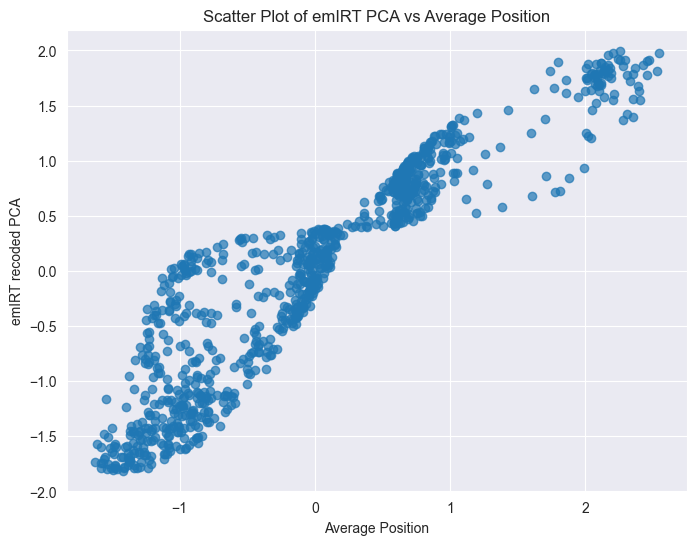

In [375]:
matrix6EMIRT = matrix6.copy()
matrix6WNOMINATE = matrix6.copy()
matrix6EMIRT[matrix6EMIRT.columns[1:]] =  matrix6EMIRT[matrix6EMIRT.columns[1:]].map(recodeEMIRT)
matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]] =  matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]].map(recodeWNOM)
pca = PCA(n_components=1)
scaler = StandardScaler()
basepca6 = pca.fit_transform(matrix6[matrix6.columns[1:]])
emIRTpca6 = pca.fit_transform(matrix6EMIRT[matrix6EMIRT.columns[1:]])
WNOMINATEpca6 = pca.fit_transform(matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]])
basepca6std = scaler.fit_transform(basepca6)
emIRTpca6std = scaler.fit_transform(emIRTpca6)
WNOMINATEpca6std = scaler.fit_transform(WNOMINATEpca6)
avg6std = avg6.copy()
avg6std['Average_position'] = scaler.fit_transform(avg6std['Average_position'].values.reshape(-1, 1))
full6 = pd.concat([avg6std,pd.Series(basepca6std.ravel()),pd.Series(emIRTpca6std.ravel()),pd.Series(WNOMINATEpca6std.ravel())],axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(full6['Average_position'], full6[1], alpha=0.7)

# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')

In [376]:
basepca6std

array([[-8.88477344e-01],
       [ 2.16781655e+00],
       [-4.34387877e-01],
       [-3.66475635e-01],
       [-1.15465058e+00],
       [-3.19332192e-01],
       [-2.89172284e-01],
       [-2.62854448e-01],
       [ 2.11574515e-01],
       [-4.76266606e-01],
       [-8.49502054e-01],
       [-1.50685068e+00],
       [-4.47544226e-01],
       [-3.83375157e-01],
       [-6.50643287e-01],
       [-1.07873524e+00],
       [-8.29183498e-01],
       [-6.39660164e-01],
       [-3.67251315e-01],
       [-2.11594935e-01],
       [-2.78240205e-01],
       [-3.19538226e-01],
       [-4.08480172e-01],
       [-5.39646819e-01],
       [ 1.08392504e+00],
       [-1.74745920e+00],
       [-4.06518363e-01],
       [-8.86570634e-01],
       [-4.40251902e-01],
       [-1.46887336e+00],
       [-2.78243457e-01],
       [-7.04309567e-01],
       [-1.31014669e-01],
       [-3.26906498e-01],
       [-5.44679107e-01],
       [-1.59742237e-01],
       [-8.40280252e-01],
       [ 8.52553063e-01],
       [-3.3

In [377]:
emIRTpca6std

array([[ 1.54786901],
       [ 0.35045213],
       [ 1.81342718],
       [-1.49794373],
       [-0.55348042],
       [-0.41446644],
       [ 1.07758901],
       [-0.33070422],
       [ 0.10377991],
       [-1.45245464],
       [-0.67835699],
       [-0.62825395],
       [ 1.24929837],
       [ 1.0223919 ],
       [-1.21773461],
       [ 0.71756233],
       [-1.10376623],
       [ 0.88279838],
       [ 0.04252747],
       [ 1.79897801],
       [ 1.73103609],
       [ 0.9118292 ],
       [-0.70781718],
       [-1.4272687 ],
       [-0.40086858],
       [ 0.10275603],
       [ 0.82859955],
       [ 0.73707208],
       [-1.41380639],
       [-0.02113134],
       [ 0.68146218],
       [ 0.96313531],
       [-1.51749468],
       [-0.05991984],
       [-1.36041421],
       [-1.60292498],
       [ 1.45834612],
       [ 0.73491017],
       [-0.43541454],
       [-1.1305849 ],
       [-0.06051399],
       [ 1.70906773],
       [ 0.69421652],
       [-1.73288993],
       [ 1.21762294],
       [ 0

In [378]:
WNOMINATEpca6std

array([[-0.07310544],
       [ 2.03372534],
       [-0.58950923],
       [-0.86304315],
       [ 0.60140088],
       [-0.88511438],
       [-1.00439893],
       [-1.02185199],
       [ 0.39223808],
       [-0.66123461],
       [-0.18602075],
       [ 0.75293264],
       [-0.68150425],
       [-0.78467559],
       [-0.33539903],
       [ 0.08301606],
       [-0.1369137 ],
       [-0.46891036],
       [-0.88803119],
       [-0.96237196],
       [-0.8509861 ],
       [-0.86744744],
       [-0.78554805],
       [-0.63728533],
       [ 0.93320941],
       [ 0.90011132],
       [-0.87421056],
       [-0.31099497],
       [-0.77841772],
       [ 1.06459592],
       [-1.05680876],
       [-0.44974425],
       [-1.12932144],
       [-0.93806263],
       [-0.51519989],
       [-1.12161543],
       [-0.13250659],
       [ 0.79675663],
       [-0.69582991],
       [-0.68370074],
       [-0.56954814],
       [-0.86923366],
       [ 0.1564526 ],
       [-1.0145625 ],
       [-0.79715455],
       [ 0

In [379]:
emIRTpca6std

array([[ 1.54786901],
       [ 0.35045213],
       [ 1.81342718],
       [-1.49794373],
       [-0.55348042],
       [-0.41446644],
       [ 1.07758901],
       [-0.33070422],
       [ 0.10377991],
       [-1.45245464],
       [-0.67835699],
       [-0.62825395],
       [ 1.24929837],
       [ 1.0223919 ],
       [-1.21773461],
       [ 0.71756233],
       [-1.10376623],
       [ 0.88279838],
       [ 0.04252747],
       [ 1.79897801],
       [ 1.73103609],
       [ 0.9118292 ],
       [-0.70781718],
       [-1.4272687 ],
       [-0.40086858],
       [ 0.10275603],
       [ 0.82859955],
       [ 0.73707208],
       [-1.41380639],
       [-0.02113134],
       [ 0.68146218],
       [ 0.96313531],
       [-1.51749468],
       [-0.05991984],
       [-1.36041421],
       [-1.60292498],
       [ 1.45834612],
       [ 0.73491017],
       [-0.43541454],
       [-1.1305849 ],
       [-0.06051399],
       [ 1.70906773],
       [ 0.69421652],
       [-1.73288993],
       [ 1.21762294],
       [ 0

In [380]:
avg6std = avg6.copy()
avg6std['Average_position'] = scaler.fit_transform(avg6std['Average_position'].values.reshape(-1, 1))

In [381]:
avg6std

,MepId,EPG,Average_position
0,28469,GUE–NGL,2.202204
1,28302,IND/DEM,0.100721
2,28975,GUE–NGL,2.526419
3,28367,EPP-ED,-1.083118
4,28512,NI,-0.449724
...,...,...,...
935,95280,PES,0.590582
936,95281,PES,0.669229
937,95704,EPP-ED,-0.868238
938,96101,EPP-ED,-0.515101


In [382]:
full6 = pd.concat([avg6std,pd.Series(basepca6std.ravel()),pd.Series(emIRTpca6std.ravel()),pd.Series(WNOMINATEpca6std.ravel())],axis=1)

In [383]:
full6

,MepId,EPG,Average_position,0,1,2
0,28469,GUE–NGL,2.202204,-0.888477,1.547869,-0.073105
1,28302,IND/DEM,0.100721,2.167817,0.350452,2.033725
2,28975,GUE–NGL,2.526419,-0.434388,1.813427,-0.589509
3,28367,EPP-ED,-1.083118,-0.366476,-1.497944,-0.863043
4,28512,NI,-0.449724,-1.154651,-0.553480,0.601401
...,...,...,...,...,...,...
935,95280,PES,0.590582,2.239100,0.448381,1.798827
936,95281,PES,0.669229,2.257689,0.488087,1.794710
937,95704,EPP-ED,-0.868238,2.263263,0.112827,1.882225
938,96101,EPP-ED,-0.515101,2.353821,0.298438,2.120886


Text(0, 0.5, 'emIRT recoded PCA')

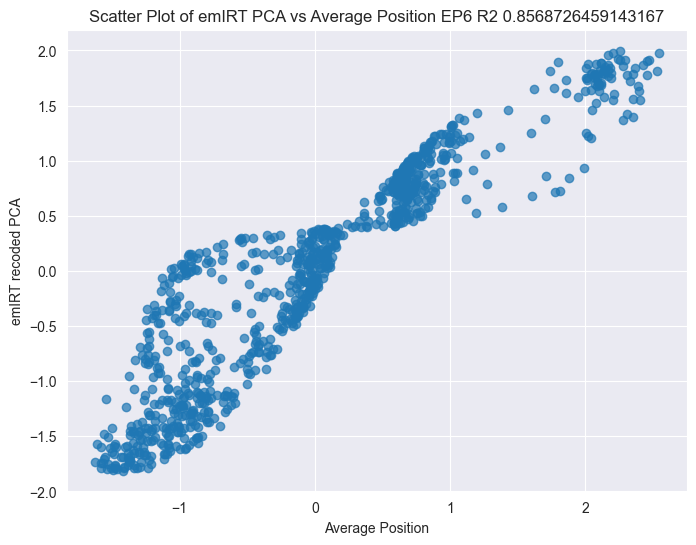

In [405]:
plt.figure(figsize=(8, 6))
plt.scatter(full6['Average_position'], full6[1], alpha=0.7)
correlation6 = full6['Average_position'].corr(full6[1])

r_squared6 = correlation6 ** 2
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP6 R2 {r_squared6}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')

In [397]:
from sklearn.metrics import mean_squared_error
correlation6 = full6['Average_position'].corr(full6[1])
mse6 = mean_squared_error(full6['Average_position'], full6[1])
from sklearn.linear_model import LinearRegression

In [399]:
model = LinearRegression().fit(full6[['Average_position']], full6[1])

In [403]:
r_squared = model.score(full6[['Average_position']], full6[1])

In [404]:
r_squared

0.8568726459143168

In [388]:
emIRTpca6 = pca.fit_transform(matrix6EMIRT[matrix6EMIRT.columns[1:]])


In [389]:
pca.explained_variance_ratio_[0]

0.2141970229629704

0.8803193834328217 -0.9382533684633494


Text(0, 0.5, 'emIRT recoded PCA')

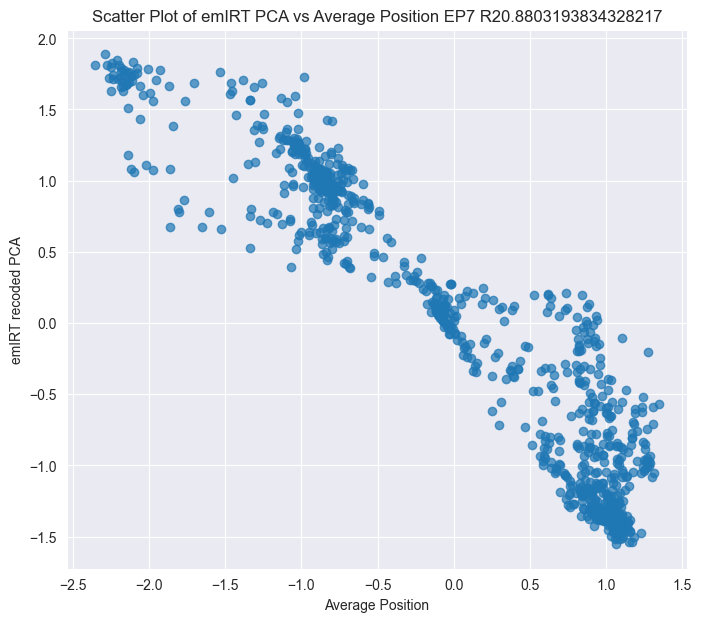

In [406]:
matrix7EMIRT = matrix7.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix7EMIRT[matrix7EMIRT.columns[1:]] =  matrix7EMIRT[matrix7EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca7 = pca.fit_transform(matrix7EMIRT[matrix7EMIRT.columns[1:]])
emIRTpca7std = scaler.fit_transform(emIRTpca7)
avg7std = avg7.copy()
avg7std['Average_position'] = scaler.fit_transform(avg7std['Average_position'].values.reshape(-1, 1))
full7 = pd.concat([avg7std,pd.Series(emIRTpca7std.ravel())],axis=1)
plt.figure(figsize=(8, 7))
plt.scatter(full7['Average_position'], full7[0], alpha=0.7)
correlation7 = full7['Average_position'].corr(full7[0])

r_squared7 = correlation7 ** 2
print(r_squared7, correlation7)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP7 R2{r_squared7}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



In [391]:
matrix7['1']

0      2
1      2
2      5
3      2
4      5
      ..
848    0
849    0
850    0
851    0
852    0
Name: 1, Length: 853, dtype: int64

0.5531967277828276 -0.7437719595298196


Text(0, 0.5, 'emIRT recoded PCA')

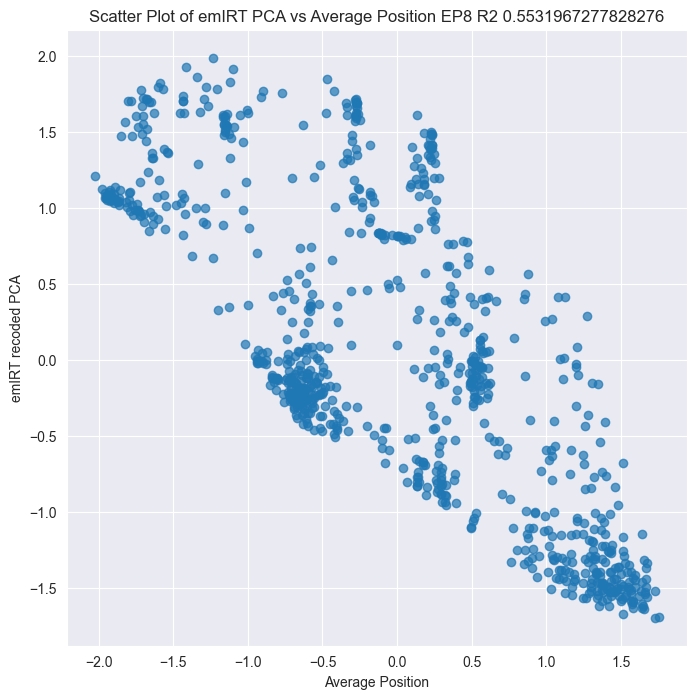

In [407]:
matrix8EMIRT = matrix8.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix8EMIRT[matrix8EMIRT.columns[1:]] =  matrix8EMIRT[matrix8EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca8 = pca.fit_transform(matrix8EMIRT[matrix8EMIRT.columns[1:]])
emIRTpca8std = scaler.fit_transform(emIRTpca8)
avg8std = avg8.copy()
avg8std['Average_position'] = scaler.fit_transform(avg8std['Average_position'].values.reshape(-1, 1))
full8 = pd.concat([avg8std,pd.Series(emIRTpca8std.ravel())],axis=1)
plt.figure(figsize=(8, 8))
plt.scatter(full8['Average_position'], full8[0], alpha=0.7)
correlation8 = full8['Average_position'].corr(full8[0])

r_squared8 = correlation8 ** 2
print(r_squared8, correlation8)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP8 R2 {r_squared8}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



0.8549931820497026 -0.9246584137127086


Text(0, 0.5, 'emIRT recoded PCA')

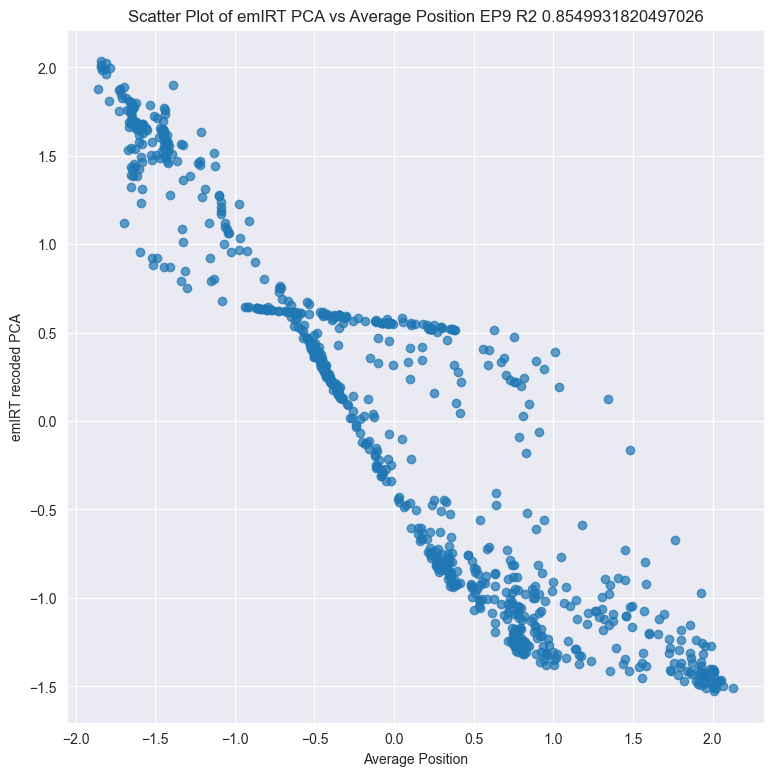

In [408]:
matrix9EMIRT = matrix9.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix9EMIRT[matrix9EMIRT.columns[1:]] =  matrix9EMIRT[matrix9EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca9 = pca.fit_transform(matrix9EMIRT[matrix9EMIRT.columns[1:]])
emIRTpca9std = scaler.fit_transform(emIRTpca9)
avg9std = avg9.copy()
avg9std['Average_position'] = scaler.fit_transform(avg9std['Average_position'].values.reshape(-1, 1))
full9 = pd.concat([avg9std,pd.Series(emIRTpca9std.ravel())],axis=1)
plt.figure(figsize=(9, 9))
plt.scatter(full9['Average_position'], full9[0], alpha=0.7)
correlation9 = full9['Average_position'].corr(full9[0])

r_squared9 = correlation9 ** 2
print(r_squared9, correlation9)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP9 R2 {r_squared9}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



In [394]:
full7

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender,0
0,Damien ABAD,EPP,0.732721,96850,Damien,Abad,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE,-0.289216
1,János ÁDER,EPP,0.860911,96659,János,Áder,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt,EPP,2009-07-14,2012-05-09,1959-05-09,MALE,-0.406652
2,John Stuart AGNEW,EFD,0.953868,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE,-0.143959
3,Gabriele ALBERTINI,EPP,1.001823,28367,Gabriele,Albertini,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE,-0.596398
4,Jan Philipp ALBRECHT,Greens–EFA,-2.122607,96736,Jan Philipp,Albrecht,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE,1.735090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-1.032554,122885,Rina Ronja,Kari,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE,0.523180
849,Giovanni BARBAGALLO,S&D,-0.543772,123792,Giovanni,Barbagallo,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE,0.320987
850,Annette KOEWIUS,EPP,0.634082,123816,Annette,Koewius,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE,0.116575
851,Katrin SAKS,S&D,-0.428299,37200,Katrin,Saks,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE,0.285241
